# Nama  : Muhammad Salman Athoriq
# Nim  : 211351101
# Kelas : IFMA Malam A
# UAS Mechine Learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from itertools import combinations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [3]:
df = pd.read_csv("Bakery.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Bakery.csv'

In [ ]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
print("Database dimension :", df.shape)
print("Database size      :", df.size)

Database dimension : (20507, 5)
Database size      : 102535


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
len(df)

20507

In [ ]:
df2 = df.copy()
df["DateTime"] = pd.to_datetime(df["DateTime"])

df["day"] = df["DateTime"].apply(lambda x : x.day)
df["month"] = df["DateTime"].apply(lambda x : x.month)
df["year"] = df["DateTime"].apply(lambda x : x.year)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = df["DateTime"].apply(lambda x : days[x.weekday()])

In [ ]:
df.describe(include=int)

,TransactionNo,day,month,year
count,20507.000000,20507.000000,20507.000000,20507.000000
mean,4976.202370,14.934169,6.026723,2016.602867
std,2796.203001,9.295083,4.140075,0.489316
min,1.000000,1.000000,1.000000,2016.000000
25%,2552.000000,4.000000,2.000000,2016.000000
50%,5137.000000,15.000000,5.000000,2017.000000
75%,7357.000000,23.000000,11.000000,2017.000000
max,9684.000000,31.000000,12.000000,2017.000000


In [ ]:
df.describe(include=object)

,Items,Daypart,DayType,weekday
count,20507,20507,20507,20507
unique,94,4,2,7
top,Coffee,Afternoon,Weekday,Saturday
freq,5471,11569,12807,3554


In [ ]:
itemFrequency = df['Items'].value_counts().sort_values(ascending=False)
itemFrequency.head(10)

Items
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: count, dtype: int64

<Axes: >

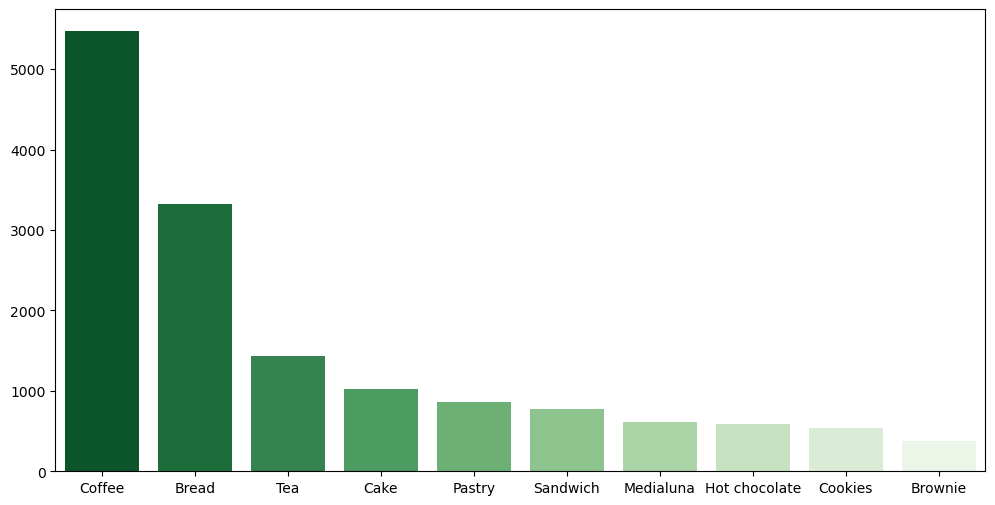

In [ ]:
len(df["TransactionNo"].value_counts())
val_counts = dict(df["Items"].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")

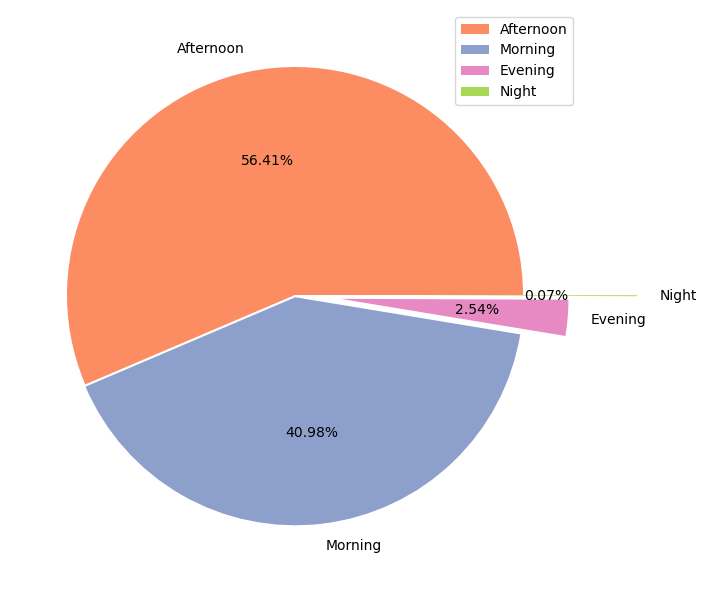

In [ ]:
daypart = dict(df.groupby('Daypart')['Items'].count().sort_values(ascending=False))
plt.figure(figsize=(10,6))
plt.pie(daypart.values(), labels=daypart.keys(), explode=[0, 0.01, 0.2, 0.5], colors = sns.color_palette("Set2")[1:], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

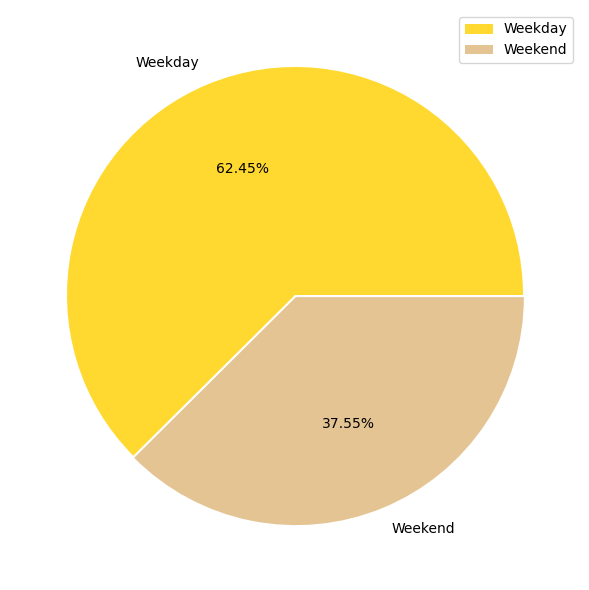

In [ ]:
daytype = dict(df.groupby("DayType")["Items"].count().sort_values(ascending=False))
plt.figure(figsize=(10,6))
plt.pie(daytype.values(), labels=daytype.keys(), explode = [0, 0.01], colors = sns.color_palette("Set2")[5:7], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

<Axes: >

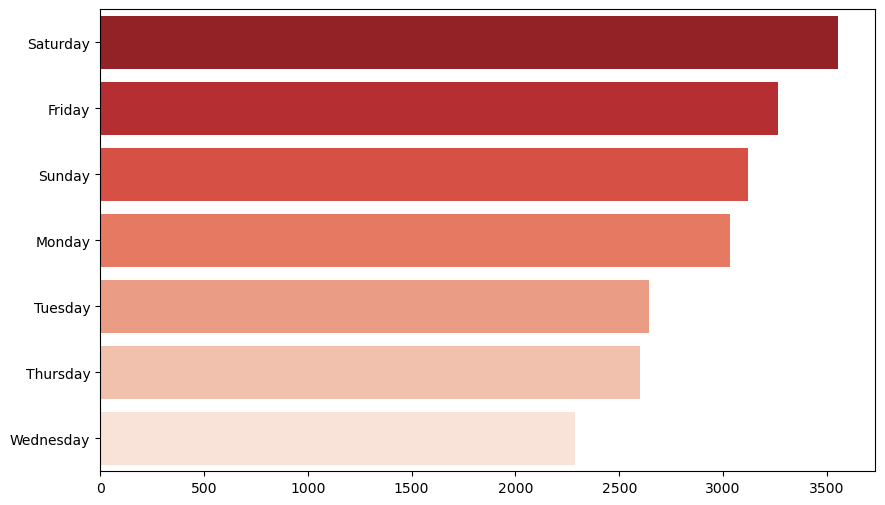

In [ ]:
weekday = dict(df.groupby("weekday")["Items"].count().sort_values(ascending=False))
plt.figure(figsize=(10,6))
sns.barplot(y=list(weekday.keys()), x=list(weekday.values()), palette="Reds_r", orient = "h")

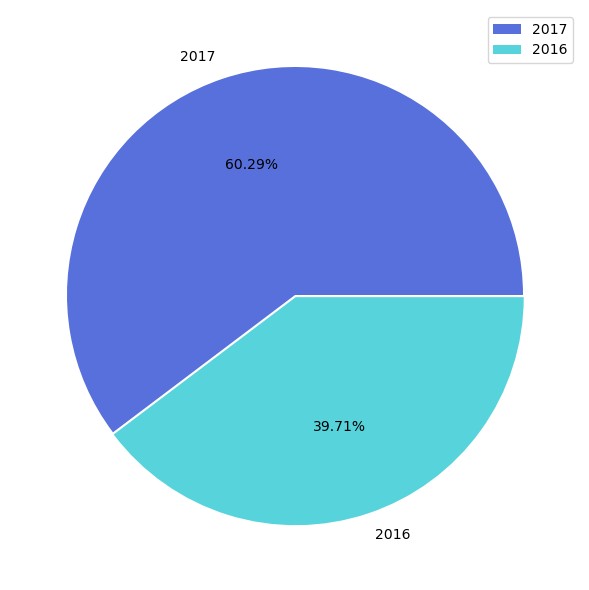

In [ ]:
year = dict(df.groupby("year")["Items"].count().sort_values(ascending=False))
plt.figure(figsize=(10,6))
plt.pie(year.values(), labels=year.keys(), explode = [0, 0.01], colors = sns.color_palette("hls",8)[5:3:-1], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

<Axes: >

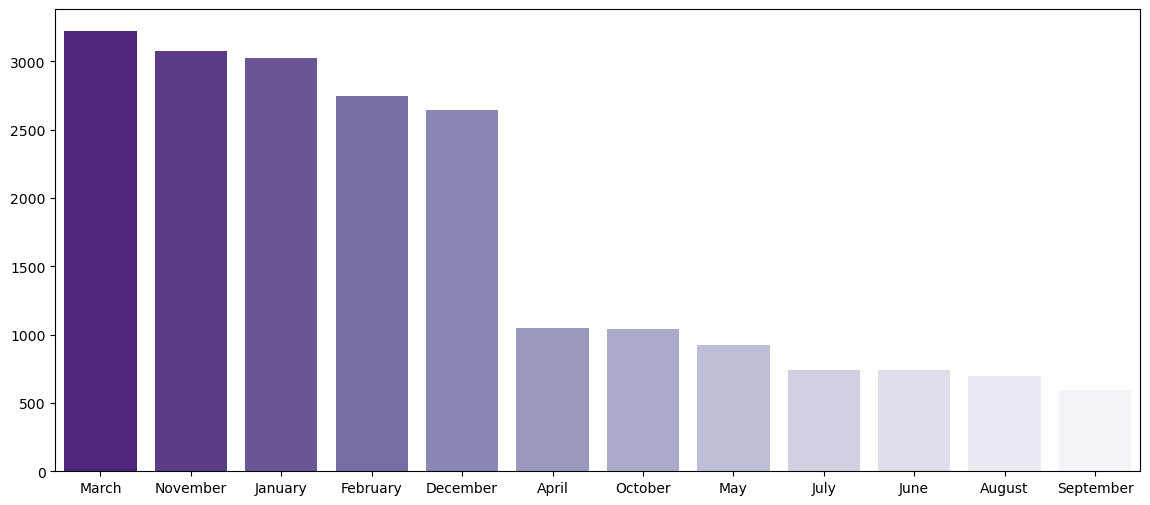

In [ ]:
month = dict(df.groupby("month")["Items"].count().sort_values(ascending=False))
plt.figure(figsize=(14,6))
sns.barplot(x=["March", "November", "January", "February", "December", "April", "October", "May", "July", "June", "August", "September"],
            y=list(month.values()), palette="Purples_r")

c:\Users\salma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



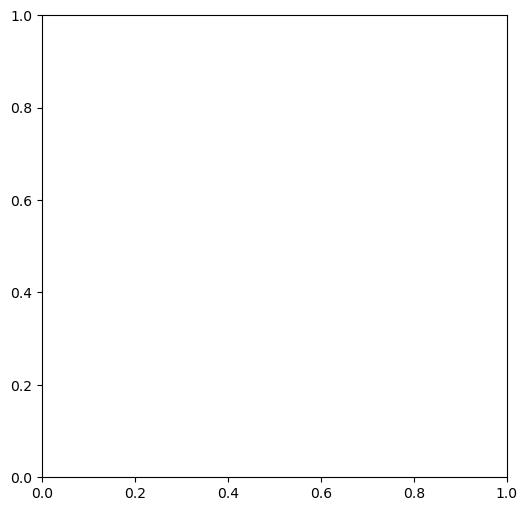

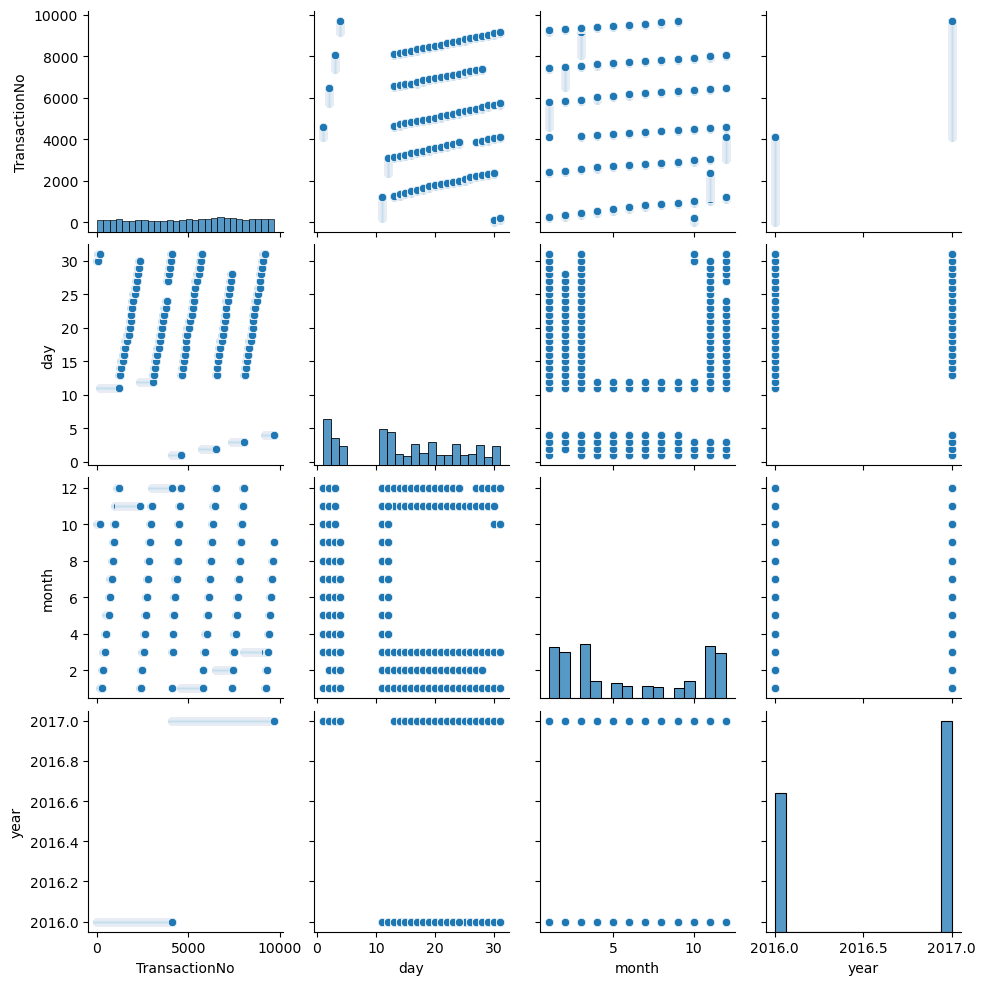

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.pairplot(df)
plt.show()

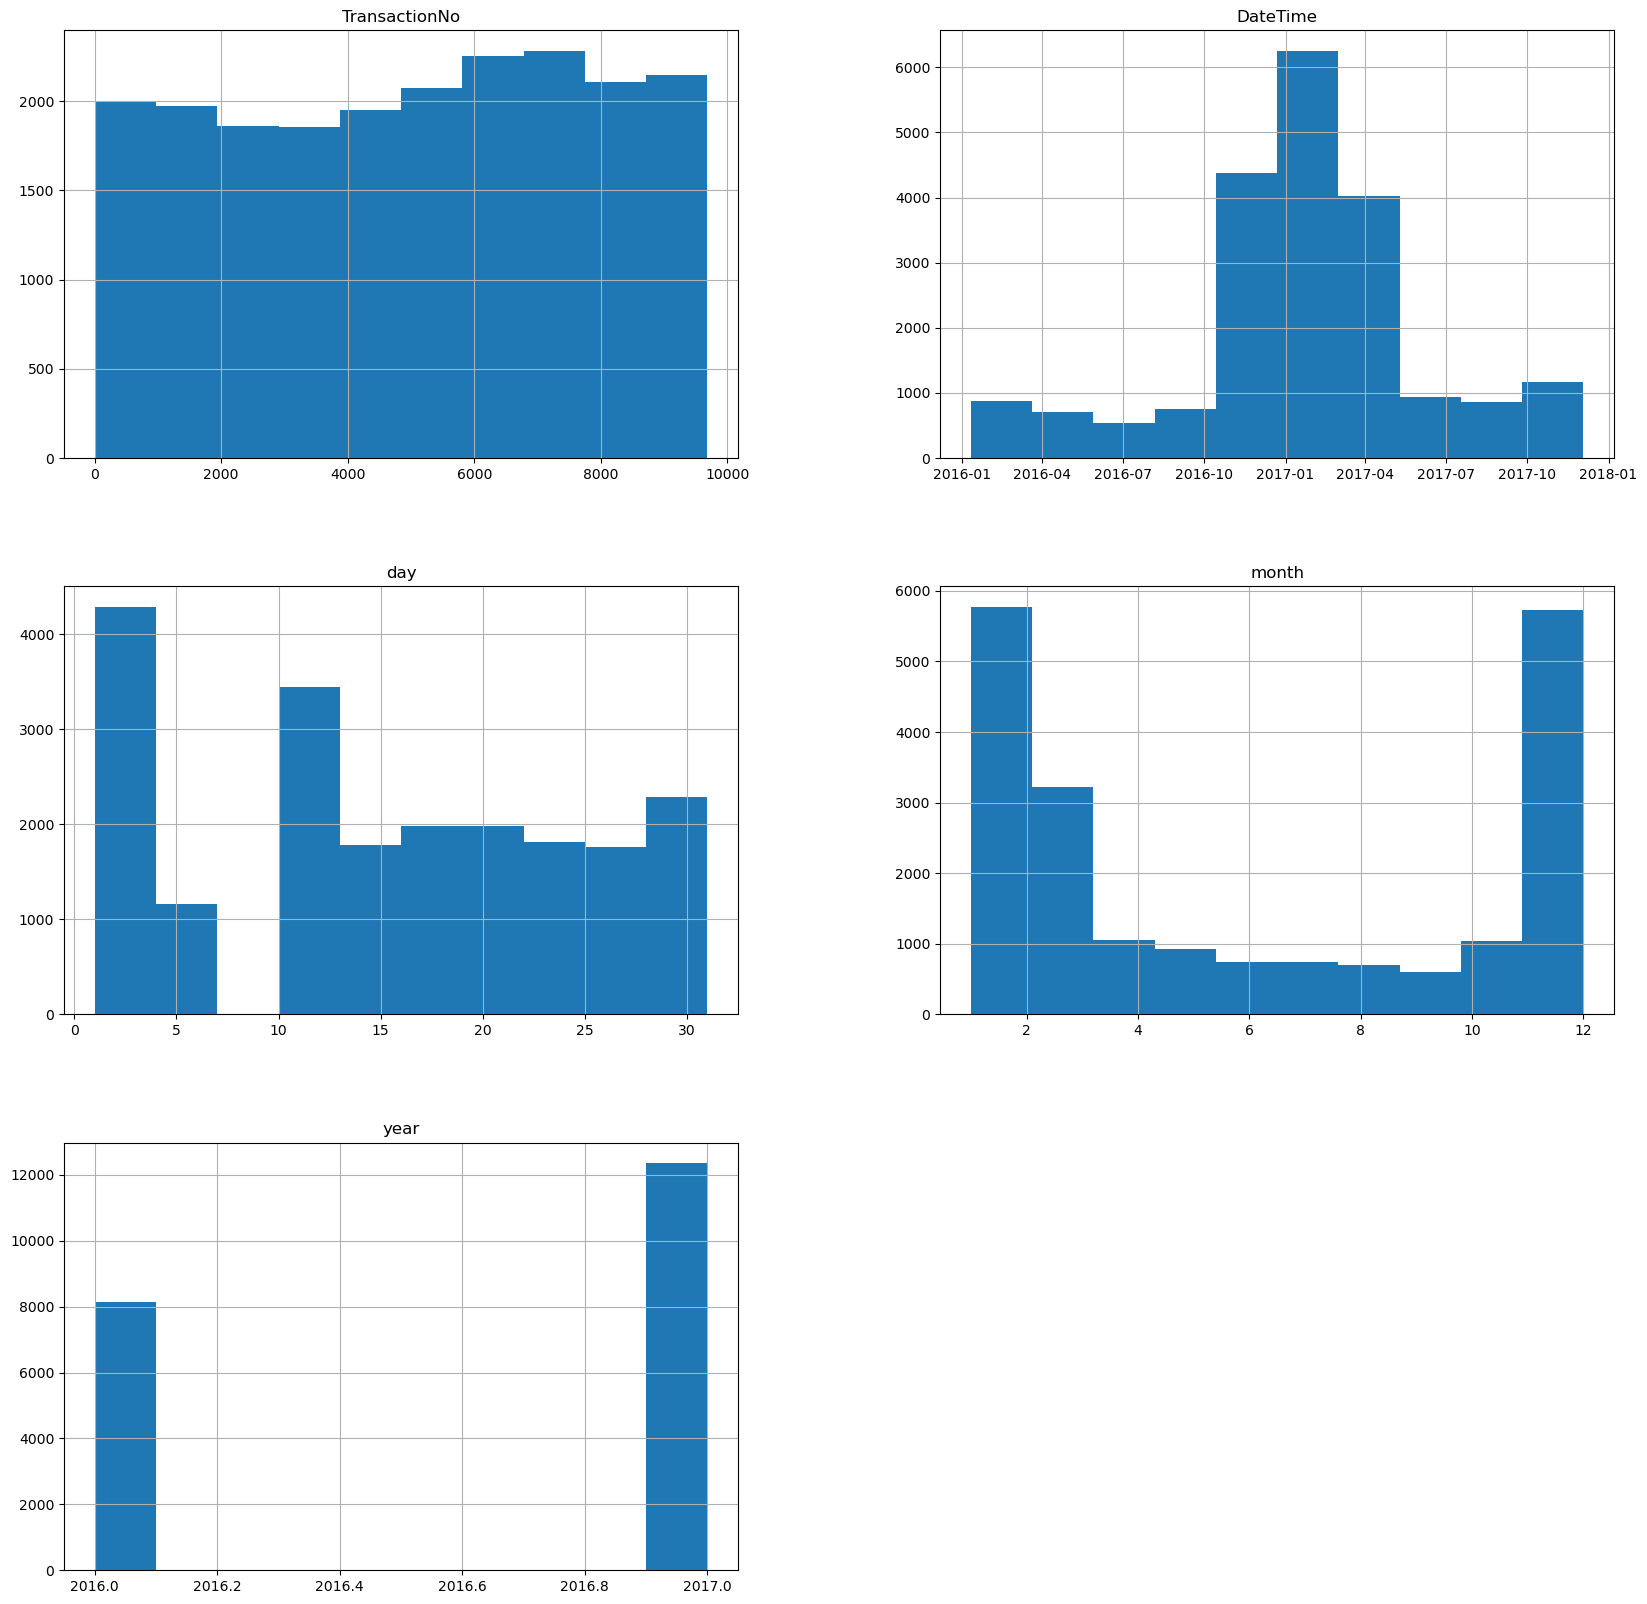

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
val_counts = df["Items"].value_counts()
val_counts.tail(10)

Items
Chimichurri Oil    2
Siblings           2
Chicken sand       1
The BART           1
Adjustment         1
Bacon              1
Gift voucher       1
Olum & polenta     1
Raw bars           1
Polenta            1
Name: count, dtype: int64

In [ ]:
excluded = list(val_counts[val_counts.values < 2].index)
transactions=[]
for action in df2["TransactionNo"].unique():
    transaction=list(set(df2[df2["TransactionNo"]==action]['Items']))
    if not any(x in transaction for x in excluded):
        if len(transaction) != 1:
            transactions.append(transaction)

In [ ]:
len(transactions)

5510

In [ ]:
transactions=[]
for item in df['TransactionNo'].unique():
    lst=list(set(df[df['TransactionNo']==item]['Items']))
    transactions.append(lst)

transactions[0:10]

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Bread', 'Pastry', 'Coffee'],
 ['Muffin', 'Medialuna', 'Pastry'],
 ['Medialuna', 'Pastry', 'Tea', 'Coffee'],
 ['Bread', 'Pastry'],
 ['Muffin', 'Bread'],
 ['Medialuna', 'Scandinavian']]

In [ ]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
data = pd.DataFrame(encodedData, columns=te.columns_)
data.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequentItems= apriori(data, use_colnames=True, min_support=0.02)
frequentItems.head()

,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)


In [ ]:
rules = association_rules(frequentItems, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Bread,Pastry,0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,Pastry,Bread,0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,Tea,Cake,0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556


In [ ]:
network_A = list(rules["antecedents"].unique())
network_B = list(rules["consequents"].unique())
node_list = list(set(network_A + network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules.iterrows():
    G.add_edges_from([(j["antecedents"], j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(x=[], y=[], line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text',
    marker=dict(showscale=True, colorscale='Burg', reversescale=True, color=[], size=15,
    colorbar=dict(thickness=10, title='Node Connections', xanchor='left', titleside='right')))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +'<br>No of Connections: {}'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
    layout=go.Layout(title='Item Connections Network', titlefont=dict(size=20),
    plot_bgcolor='white', showlegend=False, margin=dict(b=0,l=0,r=0,t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

c:\Users\salma\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\salma\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
index_names = rules[rules['consequents'] == 'Coffee'].index
refinedRules = rules.drop(index_names).sort_values('lift', ascending=False)
refinedRules.drop(['leverage','conviction'], axis=1, inplace=True)
refinedRules = refinedRules.reset_index()
refinedRules

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,zhangs_metric
0,4,Tea,Cake,0.142631,0.103856,0.023772,0.166667,1.604781,0.439556
1,5,Cake,Tea,0.103856,0.142631,0.023772,0.228891,1.604781,0.420538
2,19,Coffee,Toast,0.478394,0.033597,0.023666,0.049470,1.472431,0.615122
3,13,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,0.305936
4,15,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.256084
5,11,Coffee,Juice,0.478394,0.038563,0.020602,0.043065,1.116750,0.200428
6,16,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.194321
7,3,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.176684
8,7,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,0.148110
9,9,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,0.109048
